In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import Asso
import pandas as pd
from utils import write_cache, read_cache, get_factor_info, sample
from datasets import NoSplit, RatioSplit, CrossValidation

In [2]:
cache_path = "D:/OneDrive - Singapore Management University/cache/netflix_data_small.pickle"
X, factor_info = read_cache(cache_path)

_, _, X = sample(X, axis=0, n_samples=1000, seed=3080)
display(X.shape)

_, _, X = sample(X, axis=1, n_samples=500, seed=4060)
display(X.shape)

[I] Sampling to size 1000
[I]   Sampling seed    : 3080


(1000, 3362)

[I] Sampling to size 500
[I]   Sampling seed    : 4060


(1000, 500)

In [3]:
X_split = NoSplit(X=X)
X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

In [4]:
# model selection over k

# k = 5
# tau_list = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]
# w = [0.8, 0.2]

# for tau in tau_list:
#     asso = Asso(k=k, tau=tau, w=w)
#     asso._fit_prepare(X_train, display=True) # plot assoc and basis

In [8]:
# grid search over w
k = 10
tau_list = [0.15]
w_list = [[0.88, 0.12], [0.90, 0.10], [0.92, 0.08], [0.94, 0.06], [0.96, 0.04]]

# empty table
from utils import add_log

metrics = ['Recall', 'Precsion', 'Error', 'Accuracy', 'F1']
columns = ['time', 'k', 'tau', 'p_pos', 'p_neg'] + metrics
df_prediction = pd.DataFrame(columns=columns)

In [9]:
for tau in tau_list:
    for w in w_list:
        asso = Asso(k=k, tau=tau, w=w)
        asso.fit(X_train, display=False)

        results = asso.eval(X_val, metrics=metrics, task='prediction')
        add_log(df_prediction, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results)

[I] k            : 10
[I] tau          : 0.15
[I] weights      : [0.88, 0.12]
[I] display      : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display      : False


100%|██████████| 10/10 [00:35<00:00,  3.52s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:48:15.520487,10,0.15,0.88,0.12,0.752688,1.0,0.247312,0.752688,0.858896


[I] k            : 10
[I] tau          : 0.15
[I] weights      : [0.9, 0.1]
[I] display      : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display      : False


100%|██████████| 10/10 [00:34<00:00,  3.48s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:48:15.520487,10,0.15,0.88,0.12,0.752688,1.0,0.247312,0.752688,0.858896
1,2023-12-06 22:48:52.408326,10,0.15,0.90,0.10,0.785365,1.0,0.214635,0.785365,0.879781


[I] k            : 10
[I] tau          : 0.15
[I] weights      : [0.92, 0.08]
[I] display      : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display      : False


100%|██████████| 10/10 [00:35<00:00,  3.53s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:48:15.520487,10,0.15,0.88,0.12,0.752688,1.0,0.247312,0.752688,0.858896
1,2023-12-06 22:48:52.408326,10,0.15,0.90,0.10,0.785365,1.0,0.214635,0.785365,0.879781
2,2023-12-06 22:49:29.893035,10,0.15,0.92,0.08,0.834381,1.0,0.165619,0.834381,0.909714


[I] k            : 10
[I] tau          : 0.15
[I] weights      : [0.94, 0.06]
[I] display      : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display      : False


100%|██████████| 10/10 [00:36<00:00,  3.62s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:48:15.520487,10,0.15,0.88,0.12,0.752688,1.0,0.247312,0.752688,0.858896
1,2023-12-06 22:48:52.408326,10,0.15,0.90,0.10,0.785365,1.0,0.214635,0.785365,0.879781
2,2023-12-06 22:49:29.893035,10,0.15,0.92,0.08,0.834381,1.0,0.165619,0.834381,0.909714
3,2023-12-06 22:50:08.243467,10,0.15,0.94,0.06,0.863287,1.0,0.136713,0.863287,0.926628


[I] k            : 10
[I] tau          : 0.15
[I] weights      : [0.96, 0.04]
[I] display      : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display      : False


100%|██████████| 10/10 [00:37<00:00,  3.76s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:48:15.520487,10,0.15,0.88,0.12,0.752688,1.0,0.247312,0.752688,0.858896
1,2023-12-06 22:48:52.408326,10,0.15,0.90,0.10,0.785365,1.0,0.214635,0.785365,0.879781
2,2023-12-06 22:49:29.893035,10,0.15,0.92,0.08,0.834381,1.0,0.165619,0.834381,0.909714
3,2023-12-06 22:50:08.243467,10,0.15,0.94,0.06,0.863287,1.0,0.136713,0.863287,0.926628
4,2023-12-06 22:50:47.914002,10,0.15,0.96,0.04,0.912442,1.0,0.087558,0.912442,0.954217


In [7]:
df_prediction

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:40:33.882117,10,0.15,0.4,0.6,0.207373,1.0,0.792627,0.207373,0.343511
1,2023-12-06 22:41:04.398051,10,0.15,0.5,0.5,0.261276,1.0,0.738724,0.261276,0.414305
2,2023-12-06 22:41:38.450981,10,0.15,0.6,0.4,0.431364,1.0,0.568636,0.431364,0.602732
3,2023-12-06 22:42:12.142039,10,0.15,0.7,0.3,0.532328,1.0,0.467672,0.532328,0.694796
4,2023-12-06 22:42:49.272426,10,0.15,0.8,0.2,0.657310,1.0,0.342690,0.657310,0.793225
5,2023-12-06 22:43:25.903014,10,0.15,0.9,0.1,0.785365,1.0,0.214635,0.785365,0.879781


In [12]:
# grid search over k

k = 40
tau = 0.15
w = [0.7, 0.3]

asso = Asso(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, display=False)
display(asso.df_eval)

[I] k            : 40
[I] tau          : 0.15
[I] weights      : [0.7, 0.3]
[I] display      : False


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display      : False


100%|██████████| 40/40 [02:58<00:00,  4.47s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:05:03.880083,0,0.15,0.7,0.3,0.292697,1.0,0.707303,0.292697,0.452846
1,2023-12-06 22:05:08.458156,1,0.15,0.7,0.3,0.378997,1.0,0.621003,0.378997,0.549671
2,2023-12-06 22:05:13.369370,2,0.15,0.7,0.3,0.420891,1.0,0.579109,0.420891,0.592432
3,2023-12-06 22:05:17.876233,3,0.15,0.7,0.3,0.447005,1.0,0.552995,0.447005,0.617834
4,2023-12-06 22:05:22.041909,4,0.15,0.7,0.3,0.463622,1.0,0.536378,0.463622,0.633527
5,2023-12-06 22:05:26.277060,5,0.15,0.7,0.3,0.482893,1.0,0.517107,0.482893,0.651285
6,2023-12-06 22:05:30.567119,6,0.15,0.7,0.3,0.494903,1.0,0.505097,0.494903,0.662121
7,2023-12-06 22:05:34.751456,7,0.15,0.7,0.3,0.505795,1.0,0.494205,0.505795,0.671798
8,2023-12-06 22:05:39.009590,8,0.15,0.7,0.3,0.523949,1.0,0.476051,0.523949,0.687620
9,2023-12-06 22:05:43.305980,9,0.15,0.7,0.3,0.532328,1.0,0.467672,0.532328,0.694796


(1000, 500)
(1000, 500)


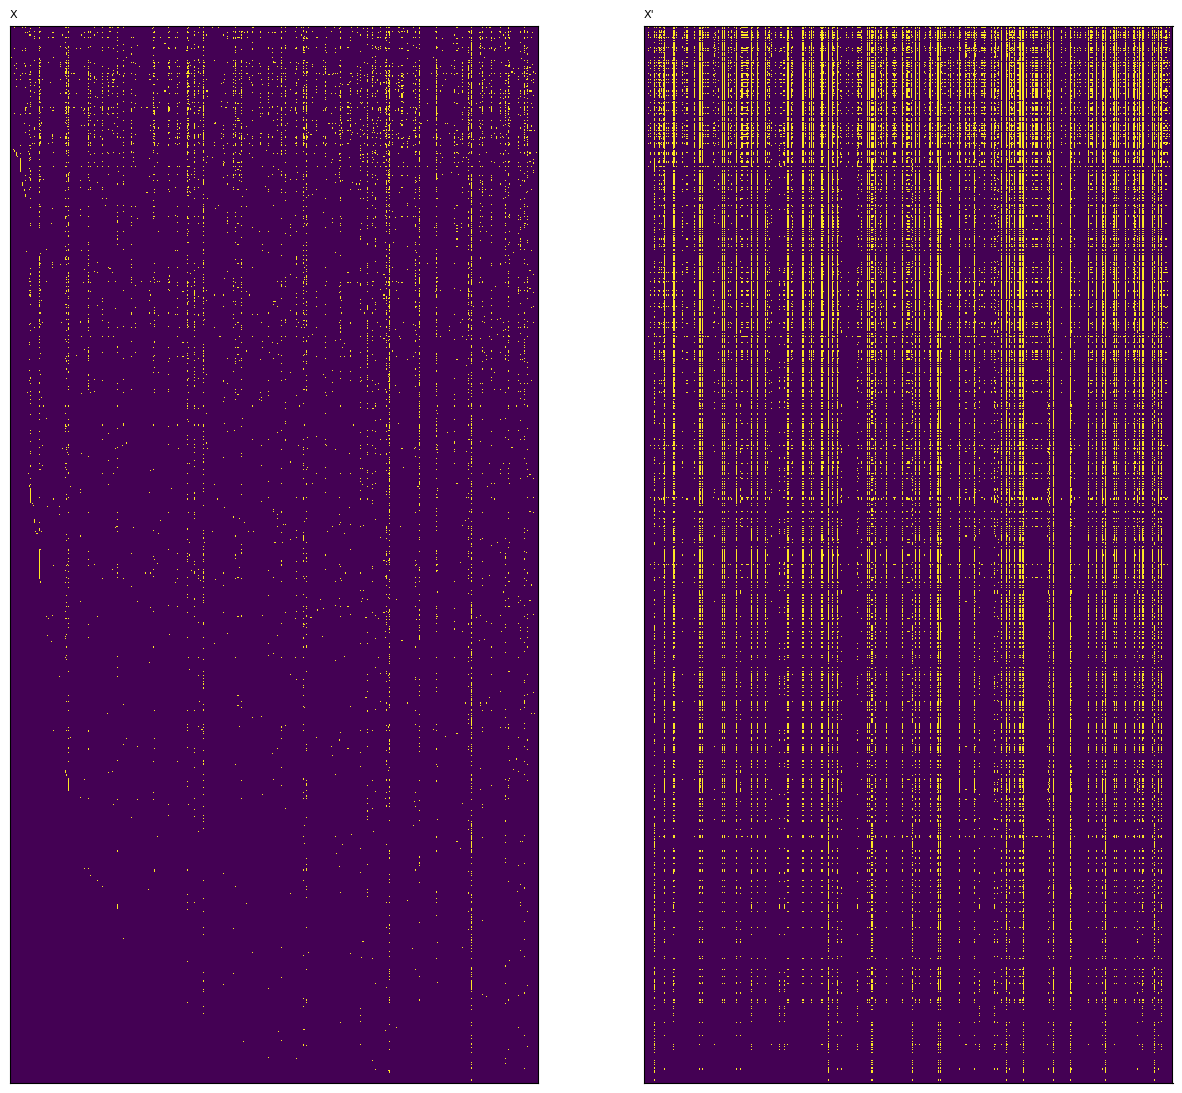

In [10]:
from utils import show_matrix, to_dense, matmul

show_matrix(settings=[(to_dense(X), [0, 0], 'X'), (matmul(asso.U, asso.V.T, sparse=False, boolean=True), [0, 1], "X'")])

### k-fold cross-validation

In [57]:
from datasets import RatioSplit, CrossValidation

In [61]:
# manually select model with ratio split

X_split = RatioSplit(X=X.X, test_size=0.2, val_size=0.15, seed=1997)
X_split.negative_sample(train_size=X_split.pos_train_size, 
                        val_size=X_split.pos_val_size, 
                        test_size=X_split.pos_test_size, 
                        seed=2023, type='popularity')
X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 18283
[I]   val_size     : 4220
[I]   test_size    : 5626
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 471871
[I]   n_negatives  : 28129
[I]   train_size   : 18283
[I]   val_size     : 4220
[I]   test_size    : 5626
[I]   seed         : 2023


In [63]:
# k = 5
# tau_list = [0.12, 0.14, 0.16, 0.18, 0.20, 0.22, 0.24, 0.26, 0.28, 0.30]
# w = [0.8, 0.2]

# for tau in tau_list:
#     asso = Asso(k=k, tau=tau, w=w)
#     asso._fit_prepare(X_train, display=True) # plot assoc and basis

In [66]:
# empty table
metrics = ['Recall', 'Precsion', 'Error', 'Accuracy', 'F1']
columns = ['time', 'k', 'tau', 'p_pos', 'p_neg'] + metrics
df_prediction_val = pd.DataFrame(columns=columns)
df_prediction_test = pd.DataFrame(columns=columns)

In [67]:
# prediction with ratio split

# grid search, apply best
k = 5
tau_list = [0.23]
w_list = [[0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]
for tau in tau_list:
    for w in w_list:
        asso = Asso(k=k, tau=tau, w=w)
        asso.fit(X_train, display=False)

        results = asso.eval(X_val, metrics=metrics, task='prediction')
        add_log(df_prediction_val, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results)
    

[I] k            : 5
[I] tau          : 0.23
[I] weights      : [0.6, 0.4]
[I] display : False
[W] Missing validation data.
[I] display : False


  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:23<00:00,  4.61s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 15:40:42.723866,5,0.23,0.6,0.4,0.251896,0.865635,0.393602,0.606398,0.390235


[I] k            : 5
[I] tau          : 0.23
[I] weights      : [0.7, 0.3]
[I] display : False
[W] Missing validation data.
[I] display : False


  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:24<00:00,  4.89s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 15:40:42.723866,5,0.23,0.6,0.4,0.251896,0.865635,0.393602,0.606398,0.390235
1,2023-12-06 15:41:10.757696,5,0.23,0.7,0.3,0.591943,0.860786,0.251896,0.748104,0.701488


[I] k            : 5
[I] tau          : 0.23
[I] weights      : [0.8, 0.2]
[I] display : False
[W] Missing validation data.
[I] display : False


  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:24<00:00,  4.94s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 15:40:42.723866,5,0.23,0.6,0.4,0.251896,0.865635,0.393602,0.606398,0.390235
1,2023-12-06 15:41:10.757696,5,0.23,0.7,0.3,0.591943,0.860786,0.251896,0.748104,0.701488
2,2023-12-06 15:41:39.084169,5,0.23,0.8,0.2,0.651659,0.862069,0.226303,0.773697,0.742240


[I] k            : 5
[I] tau          : 0.23
[I] weights      : [0.9, 0.1]
[I] display : False
[W] Missing validation data.
[I] display : False


  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 5/5 [00:24<00:00,  4.99s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 15:40:42.723866,5,0.23,0.6,0.4,0.251896,0.865635,0.393602,0.606398,0.390235
1,2023-12-06 15:41:10.757696,5,0.23,0.7,0.3,0.591943,0.860786,0.251896,0.748104,0.701488
2,2023-12-06 15:41:39.084169,5,0.23,0.8,0.2,0.651659,0.862069,0.226303,0.773697,0.742240
3,2023-12-06 15:42:07.660590,5,0.23,0.9,0.1,0.655924,0.849340,0.230213,0.769787,0.740206


In [68]:
# apply best
tau, w = 0.23, [0.9, 0.1]

asso = Asso(k=k, tau=tau, w=w)
asso.fit(X_train, display=False)

results = asso.eval(X_val, metrics=metrics, task='prediction')
add_log(df_prediction_test, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results)

[I] k            : 5
[I] tau          : 0.23
[I] weights      : [0.9, 0.1]
[I] display : False
[W] Missing validation data.
[I] display : False


  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
 60%|██████    | 3/5 [00:14<00:09,  4.87s/it]

In [65]:
# empty table
metrics = ['Recall', 'Precsion', 'Error', 'Accuracy', 'F1']
columns = ['time', 'k', 'tau', 'p_pos', 'p_neg'] + metrics
df_prediction_val = pd.DataFrame(columns=columns)
df_prediction_test = pd.DataFrame(columns=columns)
# df_reconstruction = pd.DataFrame(columns=columns)

In [46]:
# prediction with cross-validation

X_split = CrossValidation(X=X.X, test_size=0.2, n_folds=5, seed=1997)
X_split.negative_sample(train_val_size=X_split.pos_train_val_size, 
                        test_size=X_split.pos_test_size, 
                        seed=2023, type='popularity')

n_fold = 3

for i in range(n_fold):
    
    current_fold = i + 1

    X_data = X_split.get_fold(current_fold=current_fold)
    X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

    # grid search, apply best
    k = 5
    tau_list = [0.23]
    w_list = [[0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]
    for tau in tau_list:
        for w in w_list:
            asso = Asso(k=k, tau=tau, w=w)
            asso.fit(X_train, display=False)

            results = asso.eval(X_val, metrics=metrics, task='prediction')
            add_log(df_prediction_val, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results)

    # w = [best on val]
    

SyntaxError: invalid syntax (4055806527.py, line 10)